In [5]:
!conda env list


# conda environments:
#
base                   /opt/anaconda3
h501-gutenberg       * /opt/anaconda3/envs/h501-gutenberg
                       /opt/homebrew/Caskroom/miniconda/base



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the package module (avoid star-import so reload works reliably)
import tt_gutenberg.authors as authors_mod

In [4]:
gutenberg_authors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_authors.csv')
gutenberg_languages = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_languages.csv')
gutenberg_metadata = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_metadata.csv')
gutenberg_subjects = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_subjects.csv')


In [ ]:
# Load datasets once via the package helper and show status (force reload + verbose)
import importlib
import tt_gutenberg.utils as utils
# Ensure the running kernel has the latest version of the utils module
importlib.reload(utils)
# Now call the function with the new signature (reload=True, verbose=True)
utils.read_gutenberg_tables(reload=True, verbose=True)

TypeError: read_gutenberg_tables() got an unexpected keyword argument 'reload'

/var/folders/ys/3zq8g6910md1q2zt7zps4bnc0000gn/T/ipykernel_32216/713274953.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='birth_century', y='trans_count', order=order, estimator=lambda x: x.mean(), ci=95, color='C0')


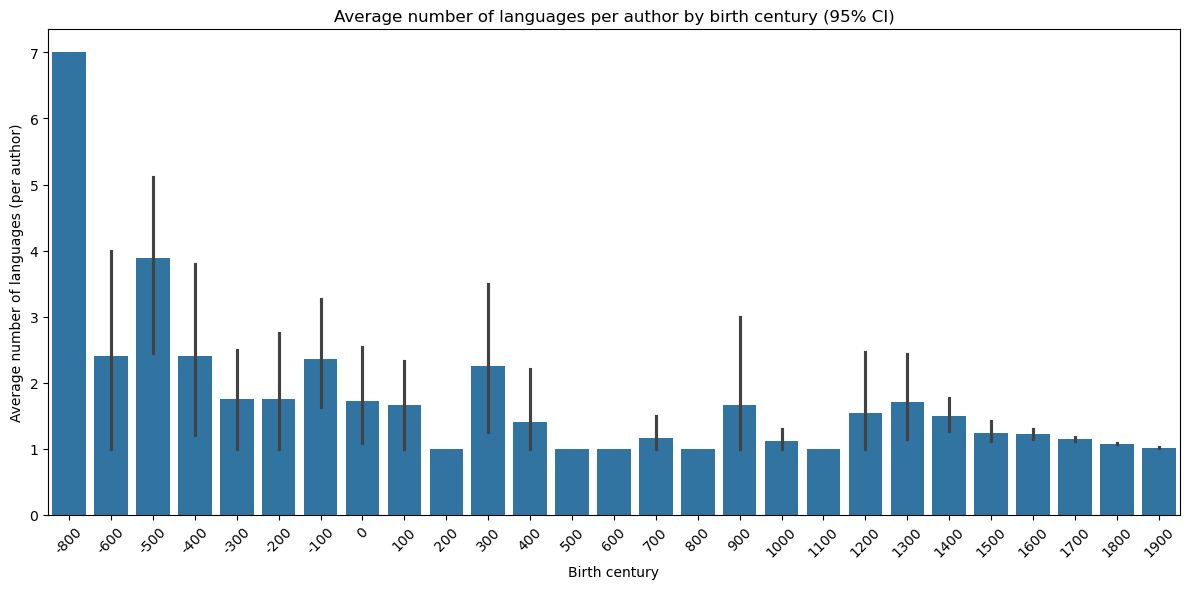

,birth_century,mean,count,std
0,-800,7.000000,1,NaN
1,-600,2.400000,5,1.949359
2,-500,3.888889,9,2.260777
3,-400,2.400000,5,1.673320
4,-300,1.750000,4,0.957427
5,-200,1.750000,4,0.957427
6,-100,2.363636,11,1.501514
7,0,1.727273,11,1.272078
8,100,1.666667,6,1.032796
9,200,1.000000,5,0.000000


In [27]:
# Use the authors module helper to get author-level translation stats
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure the latest authors_mod is loaded (so new helper functions are available)
importlib.reload(authors_mod)
# This delegates the heavy lifting to tt_gutenberg.authors.get_author_translation_stats
df = authors_mod.get_author_translation_stats(metadata=gutenberg_metadata, authors=gutenberg_authors, languages=gutenberg_languages)
# Ensure columns we need are present
if 'birth_century' not in df.columns or 'trans_count' not in df.columns:
    raise RuntimeError('Required columns missing from translation stats')
df = df.dropna(subset=['birth_century'])
df['trans_count'] = pd.to_numeric(df['trans_count'], errors='coerce').fillna(0)
order = sorted(df['birth_century'].unique())
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='birth_century', y='trans_count', order=order, estimator=lambda x: x.mean(), ci=95, color='C0')
plt.xlabel('Birth century')
plt.ylabel('Average number of languages (per author)')
plt.title('Average number of languages per author by birth century (95% CI)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
agg = df.groupby('birth_century')['trans_count'].agg(['mean','count','std']).reset_index().sort_values('birth_century')
agg

In [29]:
# Reload the authors module and display top aliases in a nice table
import importlib
import pandas as pd
importlib.reload(authors_mod)
# Get aliases (list of strings) and convert to DataFrame with counts
aliases = authors_mod.list_authors(by_languages=True, alias=True)
df_aliases = pd.DataFrame({'alias': aliases}) if aliases else pd.DataFrame(columns=['alias'])
# Count duplicates just in case and show a rank (aliases should already be ordered by translation count)
df_aliases['count'] = df_aliases.groupby('alias')['alias'].transform('count')
df_aliases = df_aliases.drop_duplicates().reset_index(drop=True)
# Show top 50 aliases. If you want more, change the number below
df_aliases.head(50)
# Optionally display length
print('total aliases:', len(df_aliases))

Successfully loaded gutenberg_authors dataset.
Successfully loaded gutenberg_languages dataset.
Successfully loaded gutenberg_languages dataset.
Successfully loaded gutenberg_metadata dataset.
Successfully loaded gutenberg_metadata dataset.
Successfully loaded gutenberg_subjects dataset.
Successfully loaded gutenberg_subjects dataset.
total aliases: 12360
total aliases: 12360
